In [1]:
import os
import matplotlib.pyplot as plt
from interstellar import Tracks, set_seed

In [3]:
seed = 101
name = 'tracks_02'
tracks_path = f'/home/ADF/ajl573/Data/interstellar_data/{name}'
tracks = Tracks(name=name)
tracks.load(tracks_path)

In [4]:
tracks.get_metadata().head()

,file_name,m,Y,FeH,MLT,ov,dif
0,m1.0Y0.24FeH-0.1MLT2.3ov0.0dif1.csv,1.00,0.24,-0.1,2.3,0.0,1
1,m0.92Y0.28FeH-0.3MLT1.7ov0.0dif1.csv,0.92,0.28,-0.3,1.7,0.0,1
2,m0.82Y0.32FeH0.1MLT2.1ov0.0dif1.csv,0.82,0.32,0.1,2.1,0.0,1
3,m0.82Y0.24FeH0.0MLT1.9ov0.0dif1.csv,0.82,0.24,0.0,1.9,0.0,1
4,m1.17Y0.28FeH0.1MLT2.3ov0.0dif1.csv,1.17,0.28,0.1,2.3,0.0,1


In [5]:
tracks.get_data().head()

,evol_stage,initial_feh,star_mass,luminosity,log_g,star_feh,log_frac_age,log_initial_mass,log_initial_MLT,log_initial_Yinit,...,log_initial_MLT_norm,log_initial_Yinit_norm,log_initial_Z_norm,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,star_feh_norm,log_surface_he4_norm,log_surface_Z_norm
0,1,-0.1,1.0,0.760630,4.560423,-0.100188,-2.394550,0.0,0.361728,-0.619789,...,0.082728,-0.066789,-0.074825,-2.172096,0.009556,-0.153267,0.227380,-0.005188,0.002002,-0.011841
1,1,-0.1,1.0,0.749957,4.564024,-0.100198,-2.385753,0.0,0.361728,-0.619789,...,0.082728,-0.066789,-0.074825,-2.163299,0.008922,-0.155067,0.230071,-0.005198,0.001994,-0.011848
2,1,-0.1,1.0,0.741406,4.566707,-0.100209,-2.375426,0.0,0.361728,-0.619789,...,0.082728,-0.066789,-0.074825,-2.152973,0.008348,-0.156409,0.232081,-0.005209,0.001984,-0.011856
3,1,-0.1,1.0,0.735484,4.568303,-0.100221,-2.363350,0.0,0.361728,-0.619789,...,0.082728,-0.066789,-0.074825,-2.140897,0.007876,-0.157207,0.233283,-0.005221,0.001973,-0.011865
4,1,-0.1,1.0,0.732361,4.568802,-0.100238,-2.349288,0.0,0.361728,-0.619789,...,0.082728,-0.066789,-0.074825,-2.126835,0.007539,-0.157456,0.233670,-0.005238,0.001958,-0.011876


In [6]:
x_cols = ['log_frac_age_norm', 'log_initial_mass_norm','log_initial_MLT_norm', 
          'log_initial_Yinit_norm', 'log_initial_Z_norm']
y_cols = ['log_star_age_norm', 'log_effective_T_norm', 'log_radius_norm',
          'log_delta_nu_fit_norm', 'log_surface_he4_norm', 'log_surface_Z_norm']

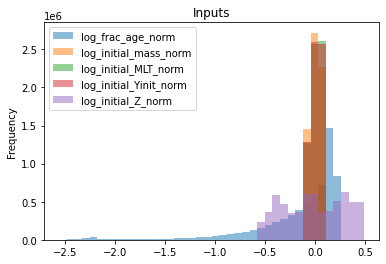

In [9]:
ax = tracks.get_data().plot(kind='hist',
                       y=x_cols,
                       bins=40, alpha=0.5)
ax.set_title('Inputs');

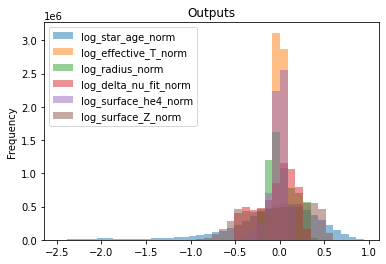

In [10]:
ax = tracks.get_data().plot(kind='hist',
                       y=y_cols,
                       bins=40, alpha=0.5)
ax.set_title('Outputs');

Shuffle the data and select columns

In [11]:
set_seed(seed)
data = tracks.sample_data(fraction=1.0, columns=x_cols+y_cols)
data.head()

,log_frac_age_norm,log_initial_mass_norm,log_initial_MLT_norm,log_initial_Yinit_norm,log_initial_Z_norm,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,log_surface_he4_norm,log_surface_Z_norm
5323617,-0.413108,-0.066581,0.082728,0.000158,-0.098340,-0.120701,-0.005829,-0.186181,0.241946,0.035663,-0.064664
4920966,0.165619,0.083181,-0.000246,0.030121,0.471477,0.150685,-0.074867,0.292421,-0.399550,0.089082,0.526601
2948371,-0.273604,0.064698,-0.102909,-0.032027,0.011987,-0.388764,0.024218,0.018269,0.001753,-0.102742,-0.052748
229413,-0.588613,-0.046610,0.082728,0.030121,-0.110549,-0.448798,0.013448,-0.168372,0.224419,0.077867,-0.066061
1054345,-0.196777,-0.018276,-0.048551,0.030121,0.376348,0.090103,-0.034648,-0.105347,0.148099,0.052552,0.400300


In [12]:
print(f'Length of dataset = {len(data)}')

Length of dataset = 6454664


In [13]:
train = data.head(int(0.8*len(data)) + 1)
val = data.tail(int(0.2*len(data)))

data = None  # Remove the data variable, no longer needed

In [14]:
print(f'Length of training data = {len(train)}')
print(f'Length of validation data = {len(val)}')

Length of training data = 5163732
Length of validation data = 1290932


In [15]:
train.to_csv(os.path.join(tracks_path, f'{tracks.name}_train.csv'), index=False)
val.to_csv(os.path.join(tracks_path, f'{tracks.name}_val.csv'), index=False)